In [2]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 파이썬 문자열 관련 함수 사용
- os
- glob
- replace
- split
- join
- strip

In [4]:
os.listdir('../dataset/cifar/')

['labels.txt', 'test', 'train']

In [41]:
train_paths = glob("../dataset/cifar/train/*.png")
test_paths = glob("../dataset/cifar/test/*.png")

In [8]:
len(train_paths), len(test_paths)

(50000, 10000)

In [10]:
sample = 'abcdefc'
sample = sample.replace('a', '22')
sample

'22bcdefc'

In [12]:
sample.split('d')

['22bc', 'efc']

In [13]:
'/'.join(['a','b','c'])

'a/b/c'

In [14]:
os.path.join('c://', 'jumin')

'c://jumin'

In [17]:
sample = '       abs        '
print(sample.strip())
print(sample.rstrip())
print(sample.lstrip())

abs
       abs
abs        


In [22]:
path = train_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

In [21]:
os.path.basename(path)

'0_frog.png'

In [23]:
os.path.dirname(path)

'../dataset/cifar/train'

In [26]:
if os.path.exists(path) == False :    
    os.makedir(path)
    print('make dir')

### class 이름 얻은 것을 함수로 묶기

In [28]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png','').split("_")[-1]
    return cls_name

In [29]:
cls_name = get_class_name(path)
path, cls_name

('../dataset/cifar/train\\0_frog.png', 'frog')

# Class 수 확인

In [58]:
train_class_names = [get_class_name(path) for path in train_paths]
test_class_names = [get_class_name(path) for path in test_paths]

In [59]:
len(train_class_names)

50000

In [60]:
train_class_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [61]:
uniques = np.unique(train_class_names, return_counts=True)
uniques

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

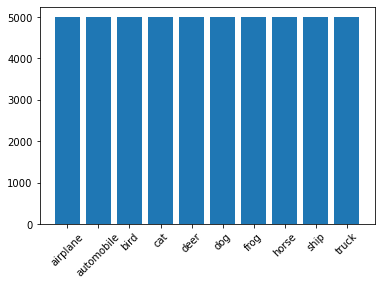

In [62]:
#plt.bar(uniques[0], uniques[1]) = 
plt.bar(*uniques)
plt.xticks(rotation=45)
plt.show()

# DataFrame 생성

파이썬에서 csv 또는 excel을 다룰 때 사용되는 library  
주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룹니다  

### DataFrame 생성 방법

In [65]:
train_data = {'name' : train_paths, "class" : train_class_names}
train_df = pd.DataFrame(train_data)

train_df.head()

name       class
0            ../dataset/cifar/train\0_frog.png        frog
1  ../dataset/cifar/train\10000_automobile.png  automobile
2        ../dataset/cifar/train\10001_frog.png        frog
3        ../dataset/cifar/train\10002_frog.png        frog
4        ../dataset/cifar/train\10003_ship.png        ship

In [66]:
test_data = {'name' : test_paths, "class" : test_class_names}
test_df = pd.DataFrame(test_data)

test_df.head()

name     class
0          ../dataset/cifar/test\0_cat.png       cat
1       ../dataset/cifar/test\1000_dog.png       dog
2  ../dataset/cifar/test\1001_airplane.png  airplane
3      ../dataset/cifar/test\1002_ship.png      ship
4      ../dataset/cifar/test\1003_deer.png      deer

## 만들어진 DataFrame 저장

In [67]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [68]:
train_df.to_csv(train_csv_path, index=False)

In [69]:
test_df.to_csv(test_csv_path, index=False)

index는 앞에 index가 csv 안에서 앞에 저장이 되지 않도록 하기 위함
- index=True -> index=False

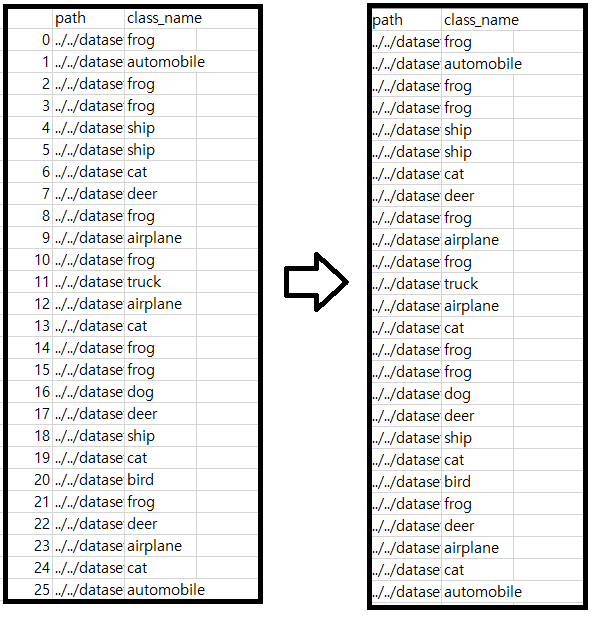

## Data 확인

In [73]:
from PIL import Image
from tqdm import tqdm_notebook

In [74]:
heights = []
widths = []

In [76]:
for path in tqdm_notebook(train_paths) : 
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-76-e9e0bd09938a>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(train_paths) :


  0%|          | 0/50000 [00:00<?, ?it/s]

In [77]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))

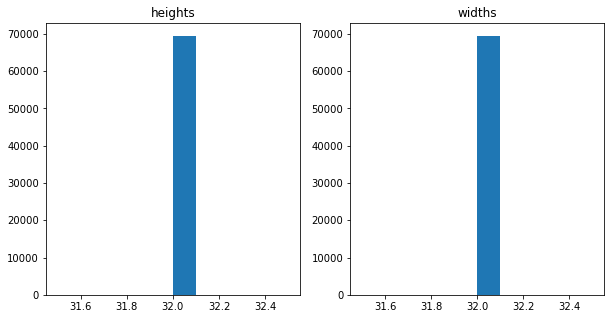

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('heights')
plt.hist(heights)

plt.subplot(122)
plt.title('widths')
plt.hist(widths)

plt.show()